In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn import tree
from sklearn.model_selection import train_test_split

In [5]:
cleaned_train_labels = pd.read_pickle( '../cleaned_train.pkl')
cleaned_train_labels # --> train

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,False,False,False,False,False,False,False,False,False,False
1,28830,2,8,900,2812,2,10,8,7,o,...,False,False,False,False,False,False,False,False,False,False
2,94947,3,21,363,8973,2,10,5,5,t,...,False,False,False,False,False,False,False,False,False,False
3,590882,2,22,418,10694,2,10,6,5,t,...,False,False,False,False,False,False,False,False,False,False
4,201944,3,11,131,1488,3,30,8,9,t,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,25,1335,1621,1,55,6,3,n,...,False,False,False,False,False,False,False,False,False,False
260597,669485,3,17,715,2060,2,0,6,5,t,...,False,False,False,False,False,False,False,False,False,False
260598,602512,3,17,51,8163,3,55,6,7,t,...,False,False,False,False,False,False,False,False,False,False
260599,151409,2,26,39,1851,2,10,14,6,t,...,False,False,False,False,False,False,False,False,False,False


In [15]:
one_hot = pd.get_dummies(cleaned_train_labels)
one_hot = one_hot.set_index('building_id')

In [16]:
X = one_hot.drop(columns=['damage_grade'])
y = one_hot['damage_grade']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
%%time
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)


CPU times: user 47.1 s, sys: 437 ms, total: 47.6 s
Wall time: 47.7 s


RandomForestClassifier(random_state=1)

In [19]:
preds = rf_model.predict(X_test)
f1_score(y_test, preds, average='micro') 

0.7114549277831498

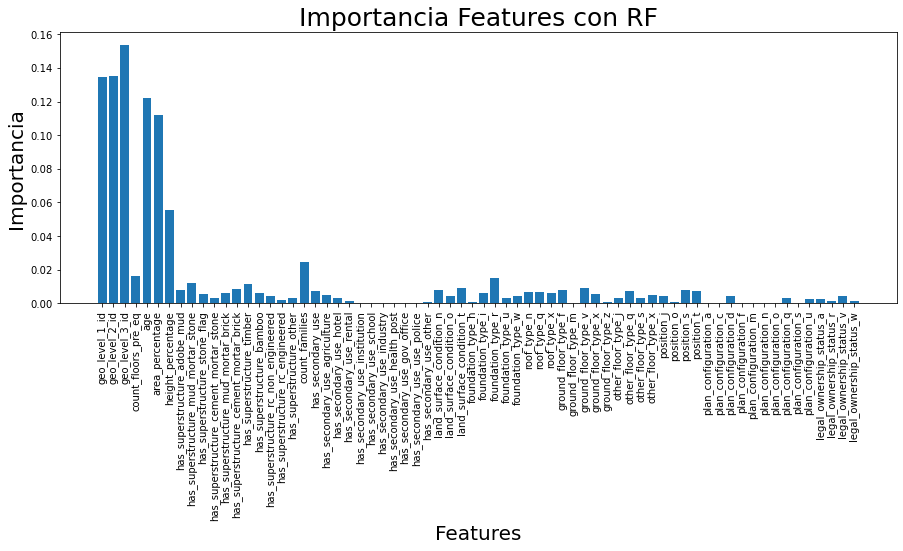

In [22]:
rf_model.feature_importances_.tolist()
pd.DataFrame(X_train)
plt.figure(figsize = (15, 5))
plt.bar(pd.DataFrame(X_train).columns, rf_model.feature_importances_)
plt.xlabel('Features', fontsize = 20)
plt.xticks(rotation = 90)
plt.ylabel('Importancia', fontsize = 20)
plt.title('Importancia Features con RF', fontsize = 25)
plt.show()